In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_excel('chatgpt_3_prompts_adding_sm_to_silicon_survey.xlsx')
df.head(2)

,Unnamed: 0,id_str,Twitter Kullanıcı Ad,Eğitim,Şehir,Etnisite,CB,CB 2. Tur,Age,age_group_survey,gender_survey,prompt_1_cg3_5,prompt_2_cg3_5,prompt_3_cg3_5,prompt_1_cg4,prompt_2_cg4,prompt_3_cg4
0,888,1659096331388875008,duygu1341,university graduate,Denizli,Turkish,Kemal Kılıçdaroğlu,Kılıçdaroğlu,60,>=40,female,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu
1,754,1644404085049769984,gamirasu376123,master's degree/PhD holder,İzmir,NaN,Kemal Kılıçdaroğlu,Kılıçdaroğlu,59,>=40,male,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu,Kılıçdaroğlu


In [3]:
#Before proceeding, turn all "Oy vermedim" and string "nan" into "NaN"
df['CB 2. Tur'] = df['CB 2. Tur'].replace(['Oy vermedim'], 'nan')
df = df.replace('nan', np.nan)

In [4]:
# Turn string values into numeric turning Erdoğan into 1 and Kılıçdaroğlu into 0
df['numeric_target'] = df['CB 2. Tur'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_3-5_1'] = df['prompt_1_cg3_5'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_3-5_2'] = df['prompt_2_cg3_5'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_3-5_3'] = df['prompt_3_cg3_5'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_4_1'] = df['prompt_1_cg4'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_4_2'] = df['prompt_2_cg4'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})
df['numeric_prediction_4_3'] = df['prompt_3_cg4'].map({'Erdoğan': 1, 'Kılıçdaroğlu': 0})

In [5]:
df['numeric_prediction_4_2'].value_counts()

0.0    666
1.0    164
Name: numeric_prediction_4_2, dtype: int64

# Finding the Most Succesful Scenario

In [6]:
import pandas as pd
from sklearn.metrics import confusion_matrix

relevant_columns = ['numeric_target', 'numeric_prediction_3-5_1', 'numeric_prediction_3-5_2', 'numeric_prediction_3-5_3', 'numeric_prediction_4_1', 'numeric_prediction_4_2', 'numeric_prediction_4_3']
df_clean = df.dropna(subset=relevant_columns)

# Computing confusion matrix for each predictor column against the target column
confusion_matrices = {}
for col in ['numeric_prediction_3-5_1', 'numeric_prediction_3-5_2', 'numeric_prediction_3-5_3', 'numeric_prediction_4_1', 'numeric_prediction_4_2', 'numeric_prediction_4_3']:
    if col in df_clean:
        # Compute confusion matrix and store it in a dictionary
        cm = confusion_matrix(df_clean['numeric_target'], df_clean[col])
        confusion_matrices[col] = cm

# Display the confusion matrices
for pred_col, cm in confusion_matrices.items():
    print(f"Confusion Matrix for {pred_col}:")
    print(cm)
    print()

Confusion Matrix for numeric_prediction_3-5_1:
[[651  57]
 [ 72   8]]

Confusion Matrix for numeric_prediction_3-5_2:
[[644  64]
 [ 56  24]]

Confusion Matrix for numeric_prediction_3-5_3:
[[648  60]
 [ 59  21]]

Confusion Matrix for numeric_prediction_4_1:
[[577 131]
 [ 56  24]]

Confusion Matrix for numeric_prediction_4_2:
[[600 108]
 [ 34  46]]

Confusion Matrix for numeric_prediction_4_3:
[[567 141]
 [ 29  51]]



In [7]:
confusion_matrices

{'numeric_prediction_3-5_1': array([[651,  57],
        [ 72,   8]], dtype=int64),
 'numeric_prediction_3-5_2': array([[644,  64],
        [ 56,  24]], dtype=int64),
 'numeric_prediction_3-5_3': array([[648,  60],
        [ 59,  21]], dtype=int64),
 'numeric_prediction_4_1': array([[577, 131],
        [ 56,  24]], dtype=int64),
 'numeric_prediction_4_2': array([[600, 108],
        [ 34,  46]], dtype=int64),
 'numeric_prediction_4_3': array([[567, 141],
        [ 29,  51]], dtype=int64)}

In [8]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Confusion matrices provided
confusion_matrices = {
    "numeric_prediction_3-5_1": np.array([[651, 57], [72, 8]]),
    "numeric_prediction_3-5_2": np.array([[644, 64], [56, 24]]),
    "numeric_prediction_3-5_3": np.array([[648, 60], [59, 21]]),
    "numeric_prediction_4_1": np.array([[577, 131], [56, 24]]),
    "numeric_prediction_4_2": np.array([[600, 108], [34, 46]]),
    "numeric_prediction_4_3": np.array([[567, 141], [29, 51]])
}

# Initialize a list to collect performance metrics
performance_metrics = []

# Calculate performance metrics for each confusion matrix
for name, cm in confusion_matrices.items():
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate precision, recall, and F1-score for each class
    precision_class_0 = tn / (tn + fn) if tn + fn != 0 else 0
    recall_class_0 = tn / (tn + fp) if tn + fp != 0 else 0
    f1_class_0 = 2 * precision_class_0 * recall_class_0 / (precision_class_0 + recall_class_0) if precision_class_0 + recall_class_0 != 0 else 0
    
    precision_class_1 = tp / (tp + fp) if tp + fp != 0 else 0
    recall_class_1 = tp / (tp + fn) if tp + fn != 0 else 0
    f1_class_1 = 2 * precision_class_1 * recall_class_1 / (precision_class_1 + recall_class_1) if precision_class_1 + recall_class_1 != 0 else 0
    
    # Calculate bias for each class
    bias_class_0 = (tn + fn) / (tn + fp) if (tn + fp) != 0 else 0
    bias_class_1 = (tp + fp) / (tp + fn) if (tp + fn) != 0 else 0
    
    # Calculate macro averages
    macro_precision = (precision_class_0 + precision_class_1) / 2
    macro_recall = (recall_class_0 + recall_class_1) / 2
    macro_f1 = (f1_class_0 + f1_class_1) / 2
    
    # Append the results to the list
    performance_metrics.append({
        "Model": name,
        "Precision (Class 0)": precision_class_0,
        "Precision (Class 1)": precision_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1,
        "F1-Score (Class 0)": f1_class_0,
        "F1-Score (Class 1)": f1_class_1,
        "Bias (Class 0)": bias_class_0,
        "Bias (Class 1)": bias_class_1,
        "Precision (Macro)": macro_precision,
        "Recall (Macro)": macro_recall,
        "F1-Score (Macro)": macro_f1
    })

# Convert list to DataFrame
metrics_df = pd.DataFrame(performance_metrics)

# Display DataFrame
print(metrics_df)


                      Model  Precision (Class 0)  Precision (Class 1)  \
0  numeric_prediction_3-5_1             0.900415             0.123077   
1  numeric_prediction_3-5_2             0.920000             0.272727   
2  numeric_prediction_3-5_3             0.916549             0.259259   
3    numeric_prediction_4_1             0.911532             0.154839   
4    numeric_prediction_4_2             0.946372             0.298701   
5    numeric_prediction_4_3             0.951342             0.265625   

   Recall (Class 0)  Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  \
0          0.919492            0.1000            0.909853            0.110345   
1          0.909605            0.3000            0.914773            0.285714   
2          0.915254            0.2625            0.915901            0.260870   
3          0.814972            0.3000            0.860552            0.204255   
4          0.847458            0.5750            0.894188            0.393162   
5 

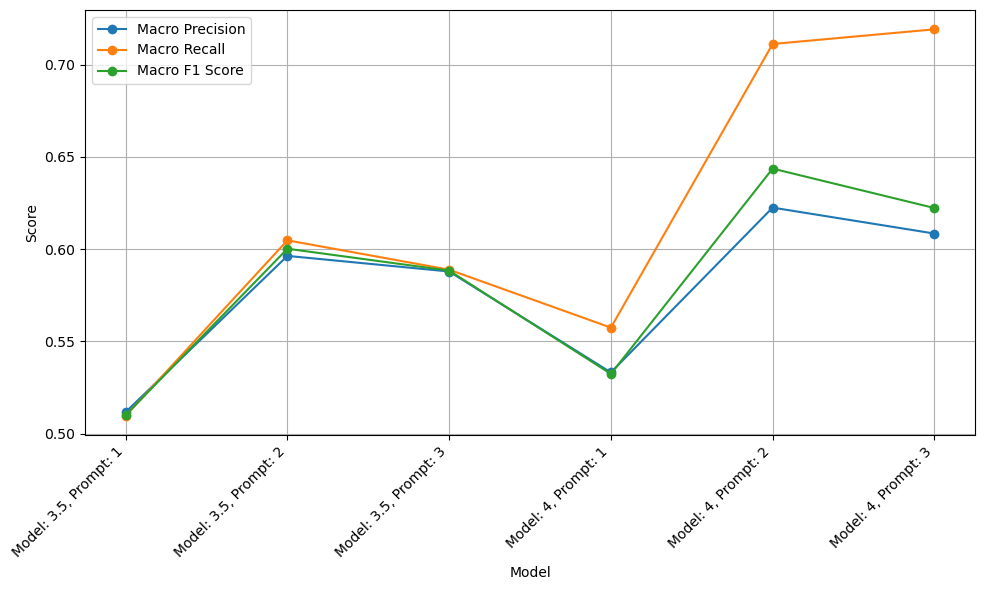

In [9]:
import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for macro metrics
macro_precision = metrics_df['Precision (Macro)']
macro_recall = metrics_df['Recall (Macro)']
macro_f1_score = metrics_df['F1-Score (Macro)']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(categories, macro_precision, marker='o', label='Macro Precision')
plt.plot(categories, macro_recall, marker='o', label='Macro Recall')
plt.plot(categories, macro_f1_score, marker='o', label='Macro F1 Score')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('macro_metrics_comparison.png')

plt.show()

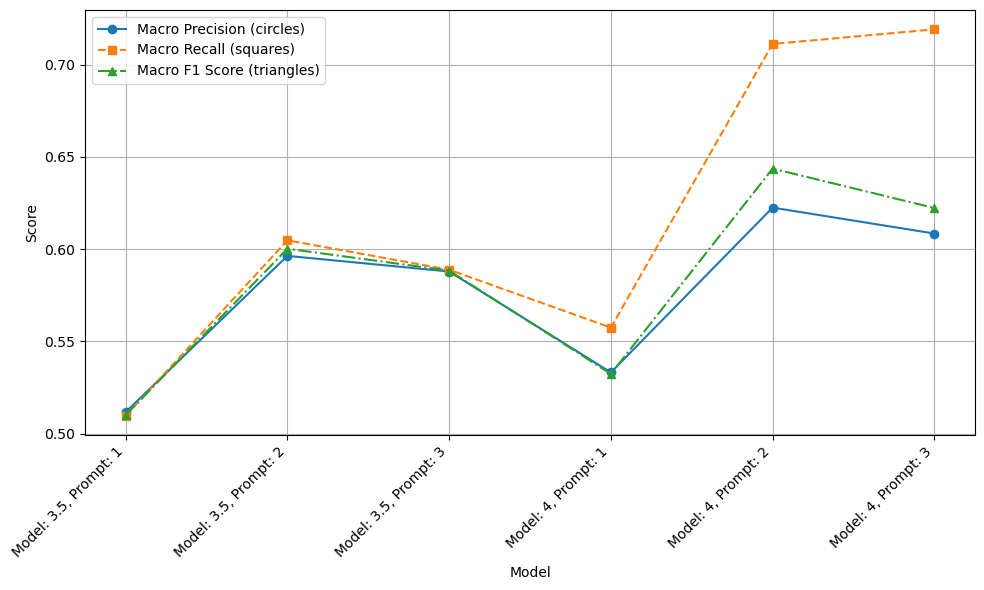

In [9]:
# Gray Plot for Journal

import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for macro metrics
macro_precision = metrics_df['Precision (Macro)']
macro_recall = metrics_df['Recall (Macro)']
macro_f1_score = metrics_df['F1-Score (Macro)']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(categories, macro_precision, linestyle='-', marker='o', label='Macro Precision (circles)')
plt.plot(categories, macro_recall, linestyle='--', marker='s', label='Macro Recall (squares)')
plt.plot(categories, macro_f1_score, linestyle='-.', marker='^', label='Macro F1 Score (triangles)')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('macro_metrics_comparison_acm.png')

plt.show()


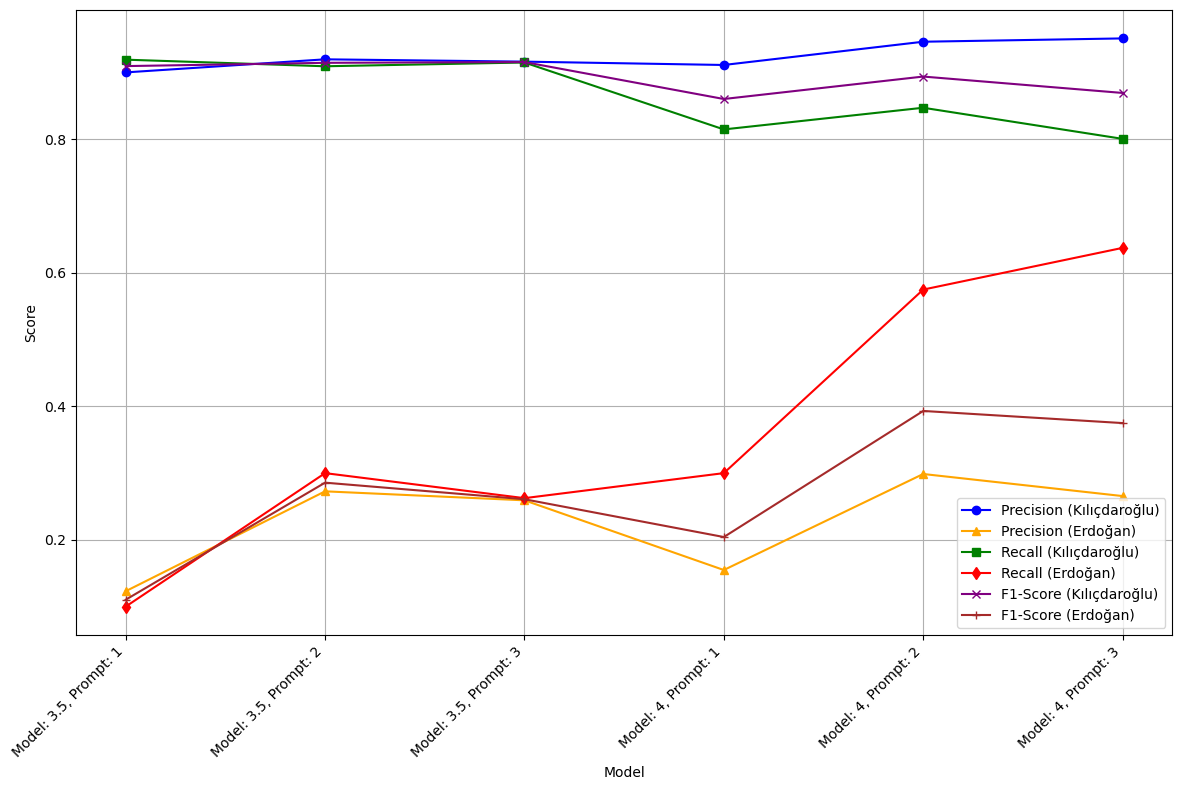

In [10]:
import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for class-specific metrics
precision_class_0 = metrics_df['Precision (Class 0)']
precision_class_1 = metrics_df['Precision (Class 1)']
recall_class_0 = metrics_df['Recall (Class 0)']
recall_class_1 = metrics_df['Recall (Class 1)']
f1_score_class_0 = metrics_df['F1-Score (Class 0)']
f1_score_class_1 = metrics_df['F1-Score (Class 1)']
bias_class_0 = metrics_df['Bias (Class 0)']
bias_class_1 = metrics_df['Bias (Class 1)']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting precision
plt.plot(categories, precision_class_0, marker='o', linestyle='-', label='Precision (Kılıçdaroğlu)', color='blue')
plt.plot(categories, precision_class_1, marker='^', linestyle='-', label='Precision (Erdoğan)', color='orange')

# Plotting recall
plt.plot(categories, recall_class_0, marker='s', linestyle='-', label='Recall (Kılıçdaroğlu)', color='green')
plt.plot(categories, recall_class_1, marker='d', linestyle='-', label='Recall (Erdoğan)', color='red')

# Plotting F1-score
plt.plot(categories, f1_score_class_0, marker='x', linestyle='-', label='F1-Score (Kılıçdaroğlu)', color='purple')
plt.plot(categories, f1_score_class_1, marker='+', linestyle='-', label='F1-Score (Erdoğan)', color='brown')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('class_specific_metrics_comparison.png')

plt.show()

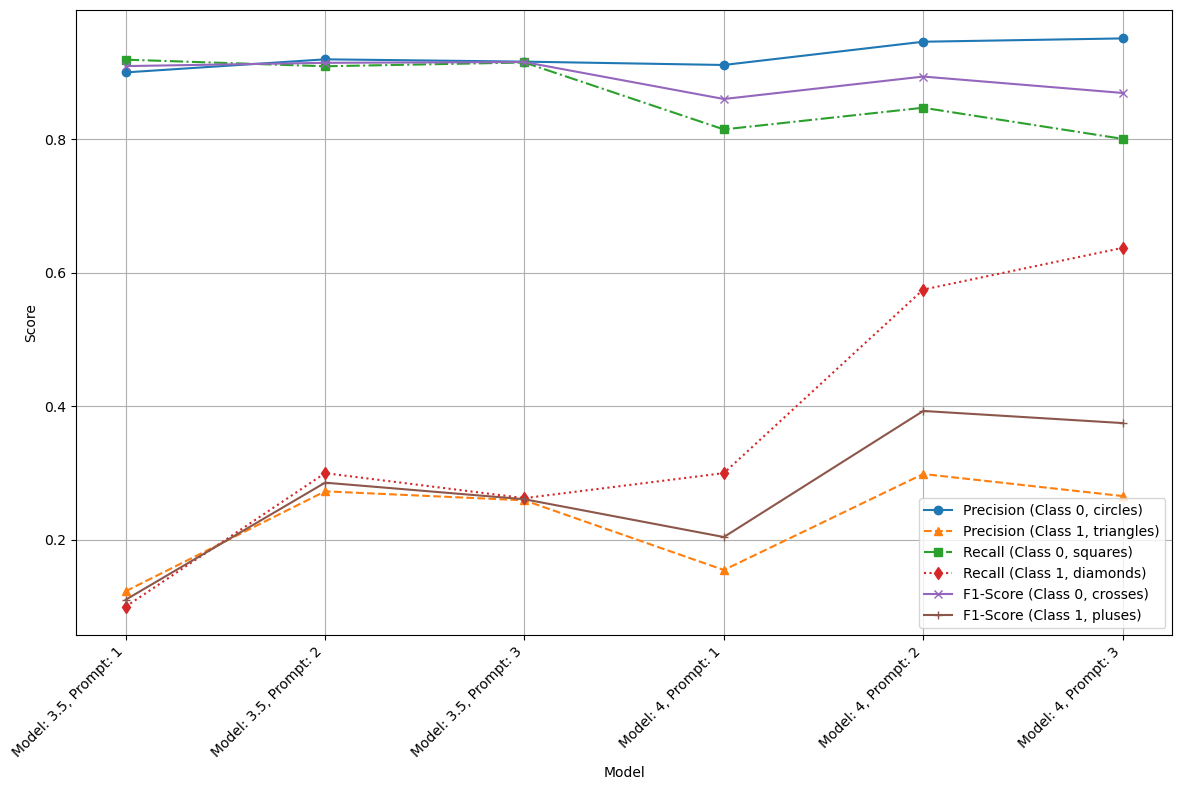

In [10]:
# Adjusted for ACM

import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for class-specific metrics
precision_class_0 = metrics_df['Precision (Class 0)']
precision_class_1 = metrics_df['Precision (Class 1)']
recall_class_0 = metrics_df['Recall (Class 0)']
recall_class_1 = metrics_df['Recall (Class 1)']
f1_score_class_0 = metrics_df['F1-Score (Class 0)']
f1_score_class_1 = metrics_df['F1-Score (Class 1)']
bias_class_0 = metrics_df['Bias (Class 0)']
bias_class_1 = metrics_df['Bias (Class 1)']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting precision
plt.plot(categories, precision_class_0, marker='o', linestyle='-', label='Precision (Class 0, circles)')
plt.plot(categories, precision_class_1, marker='^', linestyle='--', label='Precision (Class 1, triangles)')

# Plotting recall
plt.plot(categories, recall_class_0, marker='s', linestyle='-.', label='Recall (Class 0, squares)')
plt.plot(categories, recall_class_1, marker='d', linestyle=':', label='Recall (Class 1, diamonds)')

# Plotting F1-score
plt.plot(categories, f1_score_class_0, marker='x', linestyle='-', label='F1-Score (Class 0, crosses)')
plt.plot(categories, f1_score_class_1, marker='+', linestyle='-', label='F1-Score (Class 1, pluses)')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('class_specific_metrics_comparison_acm.png')

plt.show()


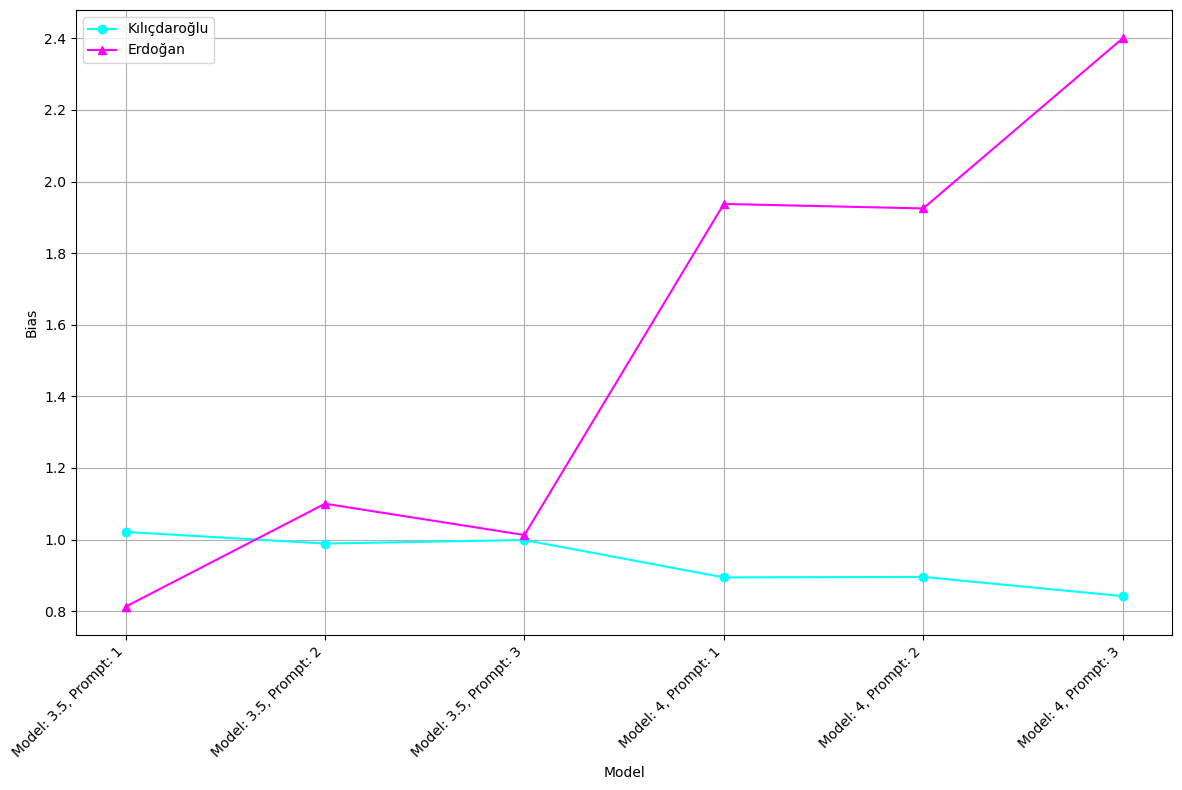

In [12]:
import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for class-specific metrics
bias_class_0 = metrics_df['Bias (Class 0)']
bias_class_1 = metrics_df['Bias (Class 1)']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting bias
plt.plot(categories, bias_class_0, marker='o', linestyle='-', label='Kılıçdaroğlu', color='cyan')
plt.plot(categories, bias_class_1, marker='^', linestyle='-', label='Erdoğan', color='magenta')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Bias')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('class_specific_bias_comparison.png')

plt.show()

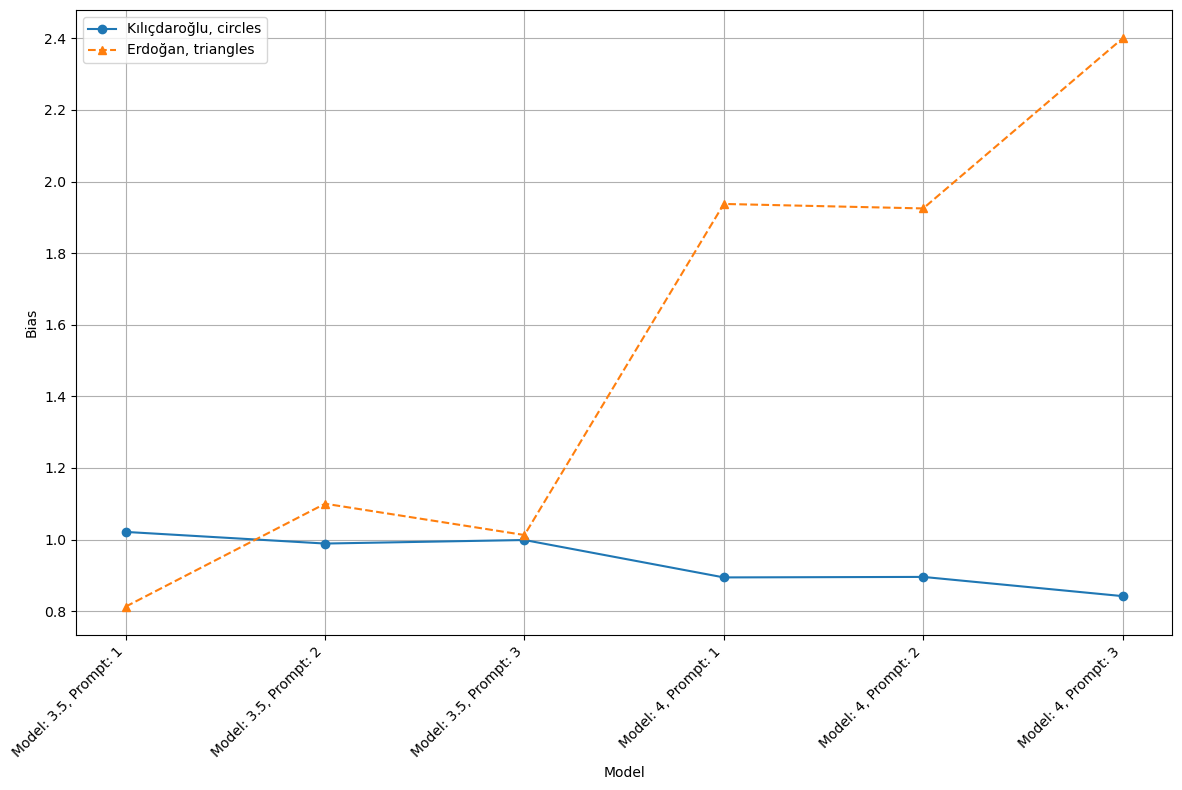

In [12]:
# Adjusted for ACM
import matplotlib.pyplot as plt

# Replace model names with desired labels
categories = [
    'Model: 3.5, Prompt: 1',
    'Model: 3.5, Prompt: 2',
    'Model: 3.5, Prompt: 3',
    'Model: 4, Prompt: 1',
    'Model: 4, Prompt: 2',
    'Model: 4, Prompt: 3'
]

# Extracting data for class-specific metrics
bias_class_0 = metrics_df['Bias (Class 0)']
bias_class_1 = metrics_df['Bias (Class 1)']

# Plotting
plt.figure(figsize=(12, 8))

# Plotting bias
plt.plot(categories, bias_class_0, marker='o', linestyle='-', label='Kılıçdaroğlu, circles')
plt.plot(categories, bias_class_1, marker='^', linestyle='--', label='Erdoğan, triangles')

# Customizing the plot
plt.xlabel('Model')
plt.ylabel('Bias')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('class_specific_bias_comparison.png')

plt.show()


# Check Group Level Diversity

In [23]:
region_data = {
    'bölge': ['İstanbul', 'Batı Marmara', 'Ege', 'Doğu Marmara', 'Batı Anadolu', 'Akdeniz', 
              'Orta Anadolu', 'Batı Karadeniz', 'Doğu Karadeniz', 'Kuzeydoğu Anadolu', 
              'Ortadoğu Anadolu', 'Güneydoğu Anadolu'],
    'iller': ['İstanbul', 'Tekirdağ, Edirne, Kırklareli, Balıkesir, Çanakkale', 
              'İzmir, Aydın, Denizli, Muğla, Manisa, Afyonkarahisar, Kütahya, Uşak', 
              'Bursa, Eskişehir, Bilecik, Kocaeli, Sakarya, Düzce, Bolu, Yalova', 
              'Ankara, Konya, Karaman', 'Antalya, Isparta, Burdur, Adana, Mersin, Hatay, Kahramanmaraş, Osmaniye', 
              'Kırıkkale, Aksaray, Niğde, Nevşehir, Kırşehir, Kayseri, Sivas, Yozgat', 
              'Zonguldak, Karabük, Bartın, Kastamonu, Çankırı, Sinop, Samsun, Tokat, Çorum, Amasya', 
              'Trabzon, Ordu, Giresun, Rize, Artvin, Gümüşhane', 
              'Erzurum, Erzincan, Bayburt, Ağrı, Kars, Iğdır, Ardahan', 
              'Malatya, Elazığ, Bingöl, Tunceli, Van, Muş, Bitlis, Hakkari', 
              'Gaziantep, Adıyaman, Kilis, Şanlıurfa, Diyarbakır, Mardin, Batman, Şırnak, Siirt']
}

region_df = pd.DataFrame(region_data)

# Create a dictionary to map cities to regions
city_to_region = {}
for index, row in region_df.iterrows():
    cities = row['iller'].split(', ')
    for city in cities:
        city_to_region[city] = row['bölge']

# Add the 'region' column to the main DataFrame
df_clean['region'] = df_clean['Şehir'].map(city_to_region)

C:\Users\SATSIZELTI22\AppData\Local\Temp\ipykernel_4800\301620699.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region'] = df_clean['Şehir'].map(city_to_region)


In [24]:
df_clean.head(1)

,Unnamed: 0,id_str,Twitter Kullanıcı Ad,Eğitim,Şehir,Etnisite,CB,CB 2. Tur,Age,age_group_survey,...,prompt_2_cg4,prompt_3_cg4,numeric_target,numeric_prediction_3-5_1,numeric_prediction_3-5_2,numeric_prediction_3-5_3,numeric_prediction_4_1,numeric_prediction_4_2,numeric_prediction_4_3,region
0,888,1659096331388875008,duygu1341,university graduate,Denizli,Turkish,Kemal Kılıçdaroğlu,Kılıçdaroğlu,60,>=40,...,Kılıçdaroğlu,Kılıçdaroğlu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ege


In [25]:
df_clean['region'].value_counts()

İstanbul             283
Ege                  115
Batı Anadolu          92
Akdeniz               86
Doğu Marmara          79
Batı Marmara          32
Batı Karadeniz        27
Güneydoğu Anadolu     23
Orta Anadolu          17
Doğu Karadeniz        15
Ortadoğu Anadolu       8
Kuzeydoğu Anadolu      6
Name: region, dtype: int64

In [26]:
# Columns to filter by and prediction columns
filter_columns = ['Eğitim', 'Etnisite', 'age_group_survey', 'gender_survey', 'region']
prediction_columns = [
    'numeric_prediction_3-5_1', 'numeric_prediction_3-5_2',
    'numeric_prediction_3-5_3', 'numeric_prediction_4_1',
    'numeric_prediction_4_2', 'numeric_prediction_4_3']

# Initialize a list to collect results
results = []

# Iterate over each column and its unique values
for column in filter_columns:
    for value in df_clean[column].unique():
        subset_df = df_clean[df_clean[column] == value]

        # Drop rows where any of the involved columns (current prediction column or target) contains NaN
        # This operation is performed inside the loop for each prediction column to avoid dropping rows prematurely
        for pred_col in prediction_columns:
            valid_subset_df = subset_df.dropna(subset=[pred_col, 'numeric_target'])

            if not valid_subset_df.empty:
                cm = confusion_matrix(valid_subset_df['numeric_target'], valid_subset_df[pred_col])
                results.append({
                    'Column': column,
                    'Value': value,
                    'Prediction Column': pred_col,
                    'Confusion Matrix': cm,
                    'Total Samples': len(valid_subset_df)
                })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

     Column                Value         Prediction Column  \
0    Eğitim  university graduate  numeric_prediction_3-5_1   
1    Eğitim  university graduate  numeric_prediction_3-5_2   
2    Eğitim  university graduate  numeric_prediction_3-5_3   
3    Eğitim  university graduate    numeric_prediction_4_1   
4    Eğitim  university graduate    numeric_prediction_4_2   
..      ...                  ...                       ...   
181  region     Ortadoğu Anadolu  numeric_prediction_3-5_2   
182  region     Ortadoğu Anadolu  numeric_prediction_3-5_3   
183  region     Ortadoğu Anadolu    numeric_prediction_4_1   
184  region     Ortadoğu Anadolu    numeric_prediction_4_2   
185  region     Ortadoğu Anadolu    numeric_prediction_4_3   

          Confusion Matrix  Total Samples  
0     [[314, 15], [34, 0]]            363  
1    [[311, 18], [22, 12]]            363  
2     [[305, 24], [25, 9]]            363  
3     [[303, 26], [26, 8]]            363  
4    [[291, 38], [15, 19]]         

In [27]:
results_df

,Column,Value,Prediction Column,Confusion Matrix,Total Samples
0,Eğitim,university graduate,numeric_prediction_3-5_1,"[[314, 15], [34, 0]]",363
1,Eğitim,university graduate,numeric_prediction_3-5_2,"[[311, 18], [22, 12]]",363
2,Eğitim,university graduate,numeric_prediction_3-5_3,"[[305, 24], [25, 9]]",363
3,Eğitim,university graduate,numeric_prediction_4_1,"[[303, 26], [26, 8]]",363
4,Eğitim,university graduate,numeric_prediction_4_2,"[[291, 38], [15, 19]]",363
...,...,...,...,...,...
181,region,Ortadoğu Anadolu,numeric_prediction_3-5_2,"[[6, 0], [2, 0]]",8
182,region,Ortadoğu Anadolu,numeric_prediction_3-5_3,"[[6, 0], [2, 0]]",8
183,region,Ortadoğu Anadolu,numeric_prediction_4_1,"[[4, 2], [1, 1]]",8
184,region,Ortadoğu Anadolu,numeric_prediction_4_2,"[[6, 0], [2, 0]]",8


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Assuming df_clean is your cleaned DataFrame ready for analysis
# and that 'numeric_target' is the target column against which predictions are being evaluated

# Initialize a list to collect results
results = []

# Filter columns and prediction columns must be defined or known beforehand
# Example: filter_columns = ['feature1', 'feature2', ...]
# prediction_columns = ['pred_numeric_3-5_1', 'pred_numeric_3-5_2', ...]

# Iterate over each column and its unique values
for column in filter_columns:
    for value in df_clean[column]. unique():
        subset_df = df_clean[df_clean[column] == value]

        # Iterate over each prediction column
        for pred_col in prediction_columns:
            valid_subset_df = subset_df.dropna(subset=[pred_col, 'numeric_target'])

            if not valid_subset_df.empty:
                y_true = valid_subset_df['numeric_target']
                y_pred = valid_subset_df[pred_col]
                cm = confusion_matrix(y_true, y_pred)

                # Ensure the confusion matrix has the right shape
                if cm.shape == (2,2):
                    tn, fp, fn, tp = cm.ravel()
                else:
                    tn, fp, fn, tp = 0, 0, 0, 0  # Adjust as needed for cases with different outcomes
                
                # Calculate performance metrics
                precision_0 = precision_score(y_true, y_pred, labels=[0,1], average=None)[0]
                precision_1 = precision_score(y_true, y_pred, labels=[0,1], average=None)[1]
                recall_0 = recall_score(y_true, y_pred, labels=[0,1], average=None)[0]
                recall_1 = recall_score(y_true, y_pred, labels=[0,1], average=None)[1]
                f1_0 = f1_score(y_true, y_pred, labels=[0,1], average=None)[0]
                f1_1 = f1_score(y_true, y_pred, labels=[0,1], average=None)[1]
                macro_precision = precision_score(y_true, y_pred, average='macro')
                macro_recall = recall_score(y_true, y_pred, average='macro')
                macro_f1 = f1_score(y_true, y_pred, average='macro')

                # Calculate bias for each class
                bias_class_0 = (tn + fn) / (tn + fp) if (tn + fp) != 0 else 0
                bias_class_1 = (tp + fp) / (tp + fn) if (tp + fn) != 0 else 0

                results.append({
                    'Column': column,
                    'Value': value,
                    'Prediction Column': pred_col,
                    'Confusion Matrix': cm.tolist(),  # Store as list for better readability in DataFrame
                    'Total Samples': len(valid_subset_df),
                    'Precision Class 0': precision_0,
                    'Precision Class 1': precision_1,
                    'Recall Class 0': recall_0,
                    'Recall Class 1': recall_1,
                    'F1 Score Class 0': f1_0,
                    'F1 Score Class 1': f1_1,
                    'Bias Class 0': bias_class_0,
                    'Bias Class 1': bias_class_1,
                    'Macro Precision': macro_precision,
                    'Macro Recall': macro_recall,
                    'Macro F1 Score': macro_f1
                })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\L

     Column                Value         Prediction Column  \
0    Eğitim  university graduate  numeric_prediction_3-5_1   
1    Eğitim  university graduate  numeric_prediction_3-5_2   
2    Eğitim  university graduate  numeric_prediction_3-5_3   
3    Eğitim  university graduate    numeric_prediction_4_1   
4    Eğitim  university graduate    numeric_prediction_4_2   
..      ...                  ...                       ...   
181  region     Ortadoğu Anadolu  numeric_prediction_3-5_2   
182  region     Ortadoğu Anadolu  numeric_prediction_3-5_3   
183  region     Ortadoğu Anadolu    numeric_prediction_4_1   
184  region     Ortadoğu Anadolu    numeric_prediction_4_2   
185  region     Ortadoğu Anadolu    numeric_prediction_4_3   

          Confusion Matrix  Total Samples  Precision Class 0  \
0     [[314, 15], [34, 0]]            363           0.902299   
1    [[311, 18], [22, 12]]            363           0.933934   
2     [[305, 24], [25, 9]]            363           0.924242   

C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SATSIZELTI22\AppData\Local\anaconda3\Lib\site-

In [160]:
results_df.to_excel('group_level_c_matrix_w_perf_scores.xlsx')

In [35]:
results_df['Column'].value_counts()

region              72
Eğitim              36
Etnisite            36
age_group_survey    24
gender_survey       18
Name: Column, dtype: int64

In [29]:
results_df

,Column,Value,Prediction Column,Confusion Matrix,Total Samples,Precision Class 0,Precision Class 1,Recall Class 0,Recall Class 1,F1 Score Class 0,F1 Score Class 1,Bias Class 0,Bias Class 1,Macro Precision,Macro Recall,Macro F1 Score
0,Eğitim,university graduate,numeric_prediction_3-5_1,"[[314, 15], [34, 0]]",363,0.902299,0.000000,0.954407,0.000000,0.927622,0.000000,1.057751,0.441176,0.451149,0.477204,0.463811
1,Eğitim,university graduate,numeric_prediction_3-5_2,"[[311, 18], [22, 12]]",363,0.933934,0.400000,0.945289,0.352941,0.939577,0.375000,1.012158,0.882353,0.666967,0.649115,0.657289
2,Eğitim,university graduate,numeric_prediction_3-5_3,"[[305, 24], [25, 9]]",363,0.924242,0.272727,0.927052,0.264706,0.925645,0.268657,1.003040,0.970588,0.598485,0.595879,0.597151
3,Eğitim,university graduate,numeric_prediction_4_1,"[[303, 26], [26, 8]]",363,0.920973,0.235294,0.920973,0.235294,0.920973,0.235294,1.000000,1.000000,0.578133,0.578133,0.578133
4,Eğitim,university graduate,numeric_prediction_4_2,"[[291, 38], [15, 19]]",363,0.950980,0.333333,0.884498,0.558824,0.916535,0.417582,0.930091,1.676471,0.642157,0.721661,0.667059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,region,Ortadoğu Anadolu,numeric_prediction_3-5_2,"[[6, 0], [2, 0]]",8,0.750000,0.000000,1.000000,0.000000,0.857143,0.000000,1.333333,0.000000,0.375000,0.500000,0.428571
182,region,Ortadoğu Anadolu,numeric_prediction_3-5_3,"[[6, 0], [2, 0]]",8,0.750000,0.000000,1.000000,0.000000,0.857143,0.000000,1.333333,0.000000,0.375000,0.500000,0.428571
183,region,Ortadoğu Anadolu,numeric_prediction_4_1,"[[4, 2], [1, 1]]",8,0.800000,0.333333,0.666667,0.500000,0.727273,0.400000,0.833333,1.500000,0.566667,0.583333,0.563636
184,region,Ortadoğu Anadolu,numeric_prediction_4_2,"[[6, 0], [2, 0]]",8,0.750000,0.000000,1.000000,0.000000,0.857143,0.000000,1.333333,0.000000,0.375000,0.500000,0.428571


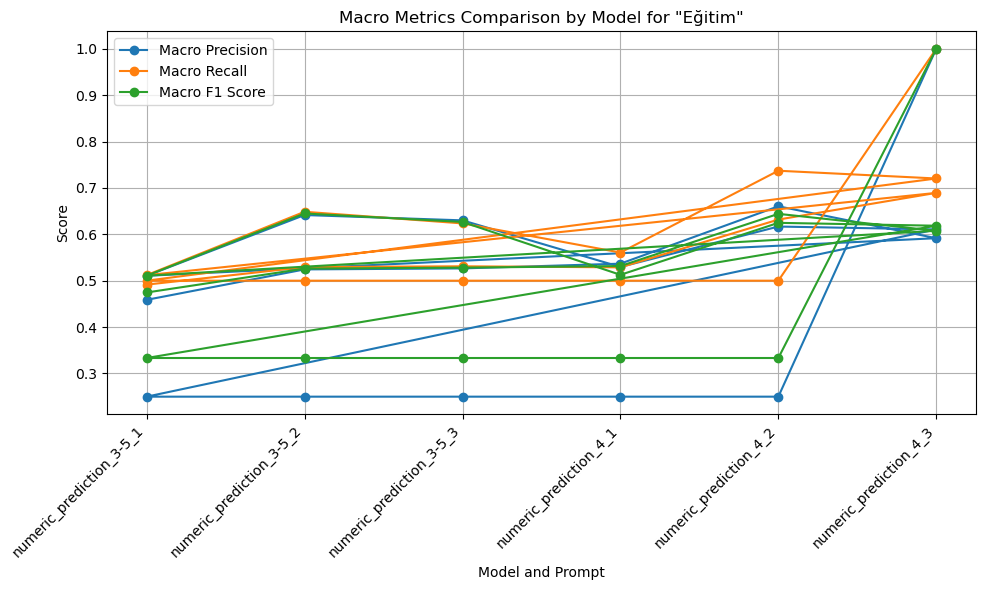

In [36]:
filtered_df = results_df[results_df['Column'] == 'gender_survey']


# Extracting the metrics for plotting
categories = filtered_df['Prediction Column'].tolist()
macro_precision = filtered_df['Macro Precision'].tolist()
macro_recall = filtered_df['Macro Recall'].tolist()
macro_f1_score = filtered_df['Macro F1 Score'].tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(categories, macro_precision, marker='o', label='Macro Precision')
plt.plot(categories, macro_recall, marker='o', label='Macro Recall')
plt.plot(categories, macro_f1_score, marker='o', label='Macro F1 Score')

plt.xlabel('Model and Prompt')
plt.ylabel('Score')
plt.title('Macro Metrics Comparison by Model for "Eğitim"')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('macro_metrics_comparison.png')
plt.show()

In [37]:
filtered_df

,Column,Value,Prediction Column,Confusion Matrix,Total Samples,Precision Class 0,Precision Class 1,Recall Class 0,Recall Class 1,F1 Score Class 0,F1 Score Class 1,Bias Class 0,Bias Class 1,Macro Precision,Macro Recall,Macro F1 Score
96,gender_survey,female,numeric_prediction_3-5_1,"[[289, 5], [26, 0]]",320,0.917460,0.000000,0.982993,0.000000,0.949097,0.000000,1.071429,0.192308,0.458730,0.491497,0.474548
97,gender_survey,female,numeric_prediction_3-5_2,"[[266, 28], [22, 4]]",320,0.923611,0.125000,0.904762,0.153846,0.914089,0.137931,0.979592,1.230769,0.524306,0.529304,0.526010
98,gender_survey,female,numeric_prediction_3-5_3,"[[267, 27], [22, 4]]",320,0.923875,0.129032,0.908163,0.153846,0.915952,0.140351,0.982993,1.192308,0.526454,0.531005,0.528151
99,gender_survey,female,numeric_prediction_4_1,"[[277, 17], [23, 3]]",320,0.923333,0.150000,0.942177,0.115385,0.932660,0.130435,1.020408,0.769231,0.536667,0.528781,0.531547
100,gender_survey,female,numeric_prediction_4_2,"[[281, 13], [18, 8]]",320,0.939799,0.380952,0.955782,0.307692,0.947723,0.340426,1.017007,0.807692,0.660376,0.631737,0.644074
101,gender_survey,female,numeric_prediction_4_3,"[[247, 47], [12, 14]]",320,0.953668,0.229508,0.840136,0.538462,0.893309,0.321839,0.880952,2.346154,0.591588,0.689299,0.607574
102,gender_survey,male,numeric_prediction_3-5_1,"[[348, 52], [44, 8]]",452,0.887755,0.133333,0.870000,0.153846,0.878788,0.142857,0.980000,1.153846,0.510544,0.511923,0.510823
103,gender_survey,male,numeric_prediction_3-5_2,"[[365, 35], [32, 20]]",452,0.919395,0.363636,0.912500,0.384615,0.915935,0.373832,0.992500,1.057692,0.641516,0.648558,0.644883
104,gender_survey,male,numeric_prediction_3-5_3,"[[368, 32], [35, 17]]",452,0.913151,0.346939,0.920000,0.326923,0.916563,0.336634,1.007500,0.942308,0.630045,0.623462,0.626598
105,gender_survey,male,numeric_prediction_4_1,"[[287, 113], [31, 21]]",452,0.902516,0.156716,0.717500,0.403846,0.799443,0.225806,0.795000,2.576923,0.529616,0.560673,0.512625
